In [1]:
import numpy as np
x=np.array([1,2])
x.shape
y=np.expand_dims(x,axis=1)
y

array([[1],
       [2]])

11490434/11490434 [==============================] - 20s 2us/step
Epoch 1/10
1875/1875 [==============================] - 41s 19ms/step - loss: 0.1491 - accuracy: 0.9538 - val_loss: 0.0584 - val_accuracy: 0.9820
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0459 - accuracy: 0.9858 - val_loss: 0.0331 - val_accuracy: 0.9898
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0327 - accuracy: 0.9901 - val_loss: 0.0301 - val_accuracy: 0.9910
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.0293 - val_accuracy: 0.9909
Epoch 5/10
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.0343 - val_accuracy: 0.9890
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0166 - accuracy: 0.9947 - val_loss: 0.0272 - val_accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 

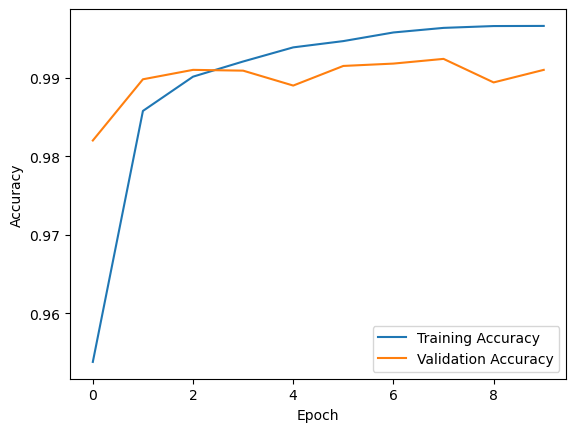

In [1]:


import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Add a channel dimension to the images (required for CNN input)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Convert labels to one-hot encoded vectors
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [7]:
import cv2 as cv
img = cv.imread("C:/Users/HP/Desktop/mypic.jpg")

cv.imshow("Display window", img)
k = cv.waitKey(0) # Wait for a keystroke in the window

In [1]:
import gym
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from collections import deque
import random

# Create the CartPole environmen
env = gym.make('CartPole-v1')

state_size = env.observation_space.shape[0]
action_size = env.action_space.n

# Define the DQN model
model = Sequential([
    Dense(24, input_dim=state_size, activation='relu'),
    Dense(24, activation='relu'),
    Dense(action_size, activation='linear')
])

model.compile(loss='mse', optimizer=Adam(lr=0.001))

# Initialize replay memory
memory = deque(maxlen=2000)
# Hyperparameters
gamma, epsilon, epsilon_min, epsilon_decay = 0.95, 1.0, 0.01, 0.995
batch_size, n_episodes = 5, 10
# Main training loop
for episode in range(n_episodes):
    state, total_reward = env.reset(), 0
    state = np.reshape(state, [1, state_size])

    for time in range(50):
        if np.random.rand() <= epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(model.predict(state)[0])

        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        total_reward += reward

        memory.append((state, action, reward, next_state, done))
        state = next_state

        if done:
            print(f"Episode: {episode + 1}, Score: {time + 1}, Epsilon: {epsilon:.2f}")
            break
            
        if len(memory) > batch_size:
            minibatch = random.sample(memory, batch_size)
            for state, action, reward, next_state, done in minibatch:
                target = reward + gamma * np.amax(model.predict(next_state)[0])
                target_f = model.predict(state)
                target_f[0][action] = target
                model.fit(state, target_f, epochs=1, verbose=0)
    epsilon = max(epsilon * epsilon_decay, epsilon_min)

env.close()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [61]:
import tensorflow as tf
import keras
from keras import layers

model=keras.Sequential(
    [
        layers.Dense(2, activation="relu",name="layer1"),
        layers.Dense(3, activation="relu",name="layer2"),
        layers.Dense(4, activation="relu",name="layer3"),
        layers.Dense(5,name="layer4")
    ]
)
x=tf.ones((3,3))
y=model(x)
y
model.pop()
# print(len(model.layers))

model.add( layers.Dense(6, activation="relu",name="layer6"))
model.add(layers.Dense(7, activation="relu",name="layer7"))
print(len(model.layers))



layer=layers.Dense(8)
layer.weights

x=tf.ones((2,2))
y=layer(x)

print(layer.weights)
# model.weights
print(len(model.weights))
print(model.summary())


5
[<tf.Variable 'dense_27/kernel:0' shape=(2, 8) dtype=float32, numpy=
array([[-0.41638055, -0.1823116 ,  0.05534232,  0.43905318,  0.22316188,
         0.19333094,  0.03883487, -0.24733919],
       [ 0.5083766 , -0.40285823,  0.37416327, -0.26041698,  0.17941415,
        -0.2452882 , -0.43073615, -0.29673785]], dtype=float32)>, <tf.Variable 'dense_27/bias:0' shape=(8,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]
10
Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (3, 2)                    8         
                                                                 
 layer2 (Dense)              (3, 3)                    9         
                                                                 
 layer3 (Dense)              (3, 4)                    16        
                                                             

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("E:/PetImages/", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)



Deleted 1578 images


In [32]:
image_size = (180, 180)
batch_size = 128

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "E:/PetImages/",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23422 files belonging to 2 classes.
Using 18738 files for training.
Using 4684 files for validation.


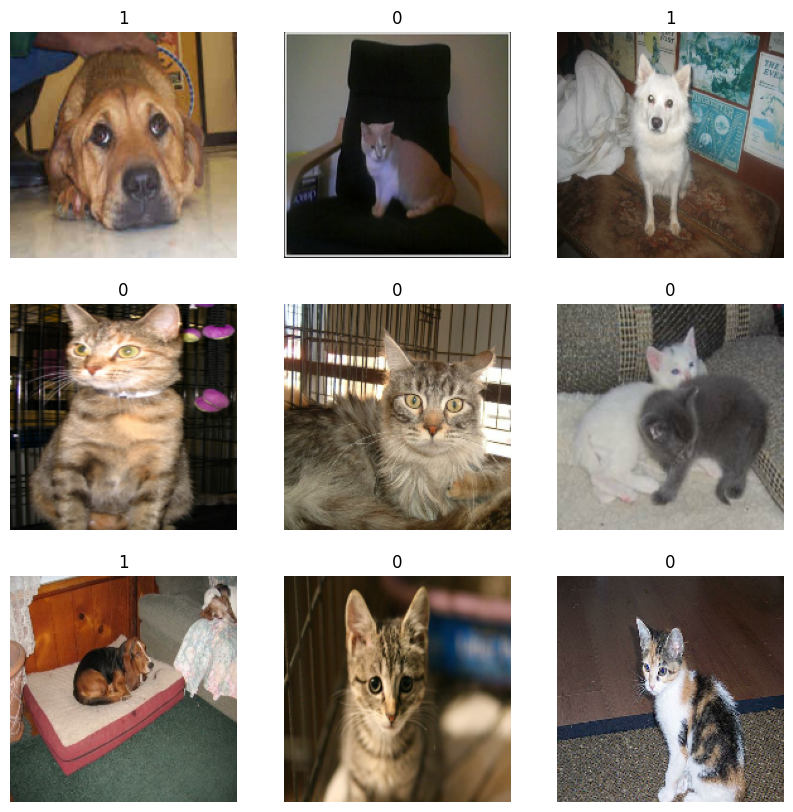

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [34]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

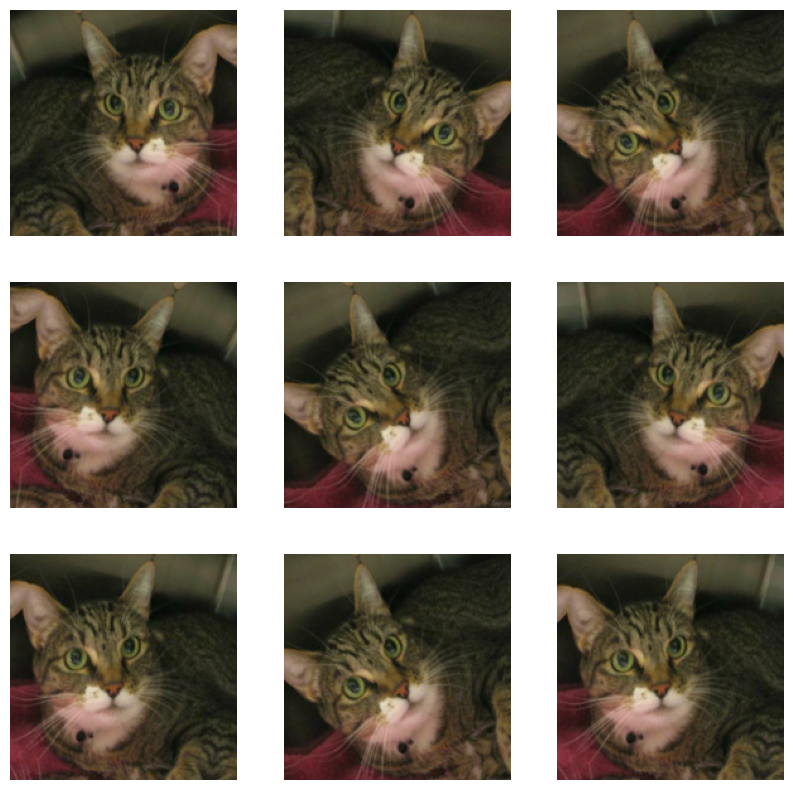

In [35]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")